### TO-DO
1. Add in matplotlib to side panel
2. Make fake graph with random sliders and boxes and whatever to change the graph
3. Integrate it into the main editor instance
4. Connect internal model values with the sliders and graph and make it "real"

In [10]:
%matplotlib inline
import jupyterlab_nodeeditor as jlne
from yggdrasil import yamlfile
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

In [2]:
filename = "X:\College\Grad School\Research\gc-Xyzic\jupyterlab_nodeeditor\examples\model_example.yml"
model_set = yamlfile.parse_yaml(filename, model_only=True)
model_sets = jlne.parse_yggdrasil_yaml(filename)

schema = yamlfile.get_schema()
socket_types = tuple(schema.form_schema['definitions']['schema']['definitions']['simpleTypes']['enum'])

ne = jlne.NodeEditor(socket_types = socket_types)

In [3]:
ne.socket_types = ('Temperature', 'Rainfall', 'Delta Time', 'Results')
ne.add_component(
    {"inputs": [
                {'title': 'Temperature Morning', 'key': 'temp1', 'socket_type': 'Temperature'},
                {'title': 'Temperature Afternoon', 'key': 'temp2', 'socket_type': 'Temperature'},
                {'title': 'Temperature Evening', 'key': 'temp3', 'socket_type': 'Temperature'}
                ],
     "outputs": [
                {'title': 'Results', 'key': 'results', 'socket_type': 'Temperature'}
                ],
     "title": "Temperature Averaging"
})

In [4]:
ne

In [6]:
# Children[0] is an ipywidget label
# "Inputs" is a VBox as is "Outputs"
ne.node_editor.nodes[0].display_element.children[0].value = "Test Name Node 1"

In [7]:
# Sample on how to add in widgets to the sidebar
slider = widgets.IntSlider()
ne.node_editor.nodes[0].display_element.children += (slider,)
slider.value = 10
slider

IntSlider(value=10)

In [11]:
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

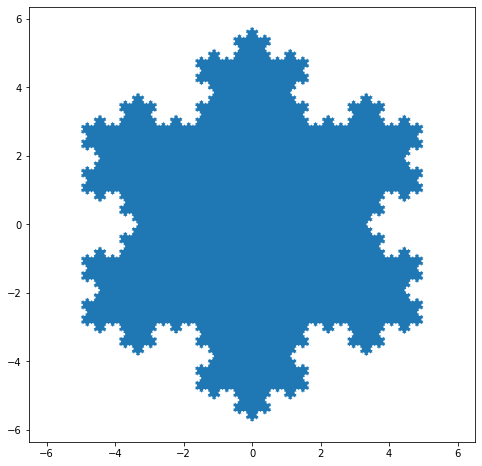

In [13]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.savefig("flake.png")

In [19]:
# Work on the plot here
file = open("flake.png", "rb")
image = file.read()
plotimg = widgets.Image(value = image, format = "png", width = 300, height = 300)

ne.node_editor.nodes[0].display_element.children += (plotimg,)